In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras import Sequential


In [3]:
from tensorflow.python.keras.layers import Dense

In [4]:
#Reading train data
data=pd.read_csv(r"D:\Tincy\datascience\jobathon\train_s3TEQDk.csv")

In [5]:
data.shape

(245725, 11)

In [6]:
data.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
ID                     245725 non-null object
Gender                 245725 non-null object
Age                    245725 non-null int64
Region_Code            245725 non-null object
Occupation             245725 non-null object
Channel_Code           245725 non-null object
Vintage                245725 non-null int64
Credit_Product         216400 non-null object
Avg_Account_Balance    245725 non-null int64
Is_Active              245725 non-null object
Is_Lead                245725 non-null int64
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [8]:
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [9]:
#Checking for missing values
data.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [10]:
data=data.dropna()

In [11]:
data.isna().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

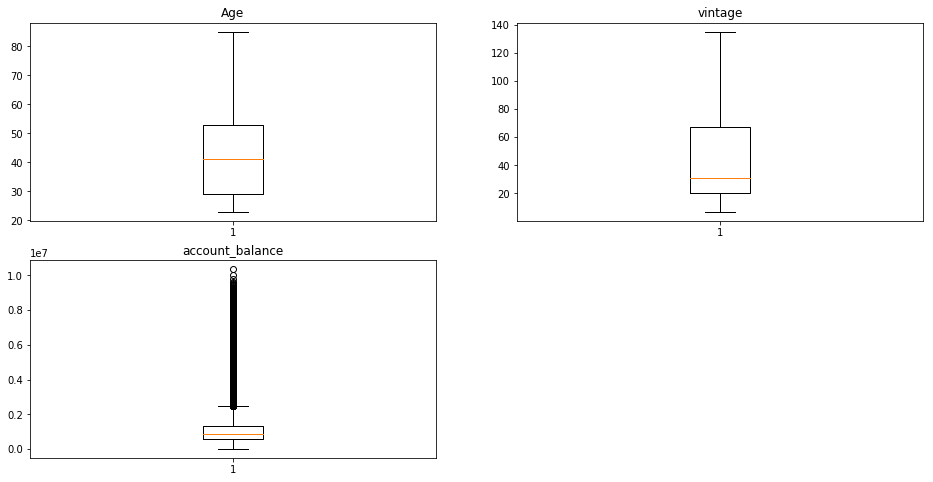

In [12]:
#Checking for outliers
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
plt.boxplot(data['Age'])
plt.title("Age")

plt.subplot(2,2,2)
plt.boxplot(data['Vintage'])
plt.title("vintage")

plt.subplot(2,2,3)
plt.boxplot(data['Avg_Account_Balance'])
plt.title("account_balance")

plt.show()
    

In [13]:
#There are outliers in column Account balance

In [14]:
#Removing Outliers
Q1 = np.percentile(data['Avg_Account_Balance'],25,interpolation='midpoint')
Q2 = np.percentile(data['Avg_Account_Balance'],50,interpolation='midpoint')
Q3 = np.percentile(data['Avg_Account_Balance'],75,interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
data=data.drop(data.loc[(data['Avg_Account_Balance']>upper_limit)|(data['Avg_Account_Balance']<low_limit)].index)
data.shape

(203312, 11)

In [15]:
#Dealing with categorical Data

#1.We can drop ID column since it is irrelevant
data=data.drop(['ID'],axis=1)
#adding new feature
data["new1"]=(data["Avg_Account_Balance"]>1200000)&(data["Age"]<430)


In [16]:
cat_col = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'object':
        cat_col.append(x)

In [17]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column
for i in  cat_col:
    data[i]=label_encoder.fit_transform(data[i])
    print(data[i].unique())

[0 1]
[18 27 20 32 11 15 33  4 19  7 29 30  2 34  9 31  8 16 10 24  6 25 23 17
 22  1 12 14 28 26 13  0  5  3 21]
[1 2 3 0]
[2 0 1 3]
[0 1]
[0 1]


In [18]:
data.describe()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,203312.000000,203312.000000,203312.000000,203312.000000,203312.000000,203312.000000,203312.000000,2.033120e+05,203312.000000,203312.000000
mean,0.534622,42.522035,19.556991,2.107337,0.822972,43.599586,0.330335,9.545512e+05,0.371085,0.152195
std,0.498801,14.698952,10.835598,0.832632,0.882546,30.849909,0.470335,4.931106e+05,0.483096,0.359210
min,0.000000,23.000000,0.000000,0.000000,0.000000,7.000000,0.000000,2.079000e+04,0.000000,0.000000
25%,0.000000,29.000000,10.000000,1.000000,0.000000,20.000000,0.000000,5.797100e+05,0.000000,0.000000
50%,1.000000,40.000000,19.000000,2.000000,1.000000,31.000000,0.000000,8.415705e+05,0.000000,0.000000
75%,1.000000,52.000000,30.000000,3.000000,2.000000,63.000000,1.000000,1.230220e+06,1.000000,0.000000
max,1.000000,85.000000,34.000000,3.000000,3.000000,135.000000,1.000000,2.472482e+06,1.000000,1.000000


In [19]:
data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,new1
0,0,73,18,1,2,43,0,1045696,0,0,False
1,0,30,27,2,0,32,0,581988,0,0,False
2,0,56,18,3,2,26,0,1484315,1,0,True
3,1,34,20,2,0,19,0,470454,0,0,False
4,0,30,32,2,0,33,0,886787,0,0,False


In [20]:
data1=data.loc[(data["Is_Lead"]==1)]
data1.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,new1
16,0,46,18,1,2,97,1,2282502,0,1,True
17,0,59,33,1,2,15,1,2384692,0,1,True
20,1,44,19,3,1,19,1,1001650,0,1,False
29,0,52,33,3,2,56,1,1056910,1,1,False
34,1,67,18,1,0,87,1,1684182,0,1,True


In [21]:
data2=data.loc[(data["Is_Lead"]==0)]
data2.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,new1
0,0,73,18,1,2,43,0,1045696,0,0,False
1,0,30,27,2,0,32,0,581988,0,0,False
2,0,56,18,3,2,26,0,1484315,1,0,True
3,1,34,20,2,0,19,0,470454,0,0,False
4,0,30,32,2,0,33,0,886787,0,0,False


In [22]:
data["new"]=data["Credit_Product"]|data["Is_Active"]


In [23]:
data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,new1,new
0,0,73,18,1,2,43,0,1045696,0,0,False,0
1,0,30,27,2,0,32,0,581988,0,0,False,0
2,0,56,18,3,2,26,0,1484315,1,0,True,1
3,1,34,20,2,0,19,0,470454,0,0,False,0
4,0,30,32,2,0,33,0,886787,0,0,False,0


In [24]:
#Splitting features and output
x_train = data.drop(['Is_Lead'],axis=1)

y_train = data['Is_Lead']

In [25]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train=std.fit_transform(x_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype bool, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype bool, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
#Reading test data
data_test=pd.read_csv(r"D:\Tincy\datascience\jobathon\test_mSzZ8RL.csv")
data_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [27]:
data_test.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


In [28]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
ID                     105312 non-null object
Gender                 105312 non-null object
Age                    105312 non-null int64
Region_Code            105312 non-null object
Occupation             105312 non-null object
Channel_Code           105312 non-null object
Vintage                105312 non-null int64
Credit_Product         92790 non-null object
Avg_Account_Balance    105312 non-null int64
Is_Active              105312 non-null object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [29]:
data_test.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [30]:
data_test.shape

(105312, 10)

In [31]:
data_test['Credit_Product'].value_counts()

No     61608
Yes    31182
Name: Credit_Product, dtype: int64

In [47]:
data_test['Credit_Product']=data_test['Credit_Product'].bfill()

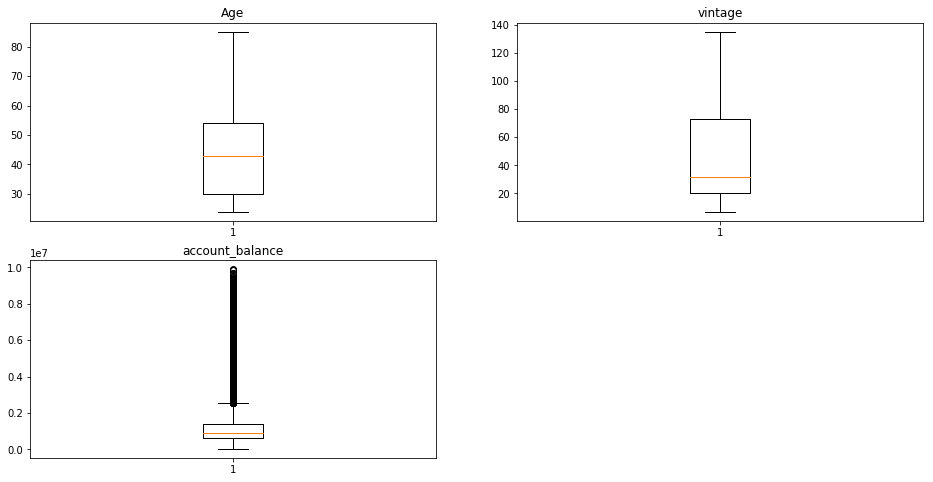

In [48]:
#Checking for outliers
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
plt.boxplot(data_test['Age'])
plt.title("Age")

plt.subplot(2,2,2)
plt.boxplot(data_test['Vintage'])
plt.title("vintage")

plt.subplot(2,2,3)
plt.boxplot(data_test['Avg_Account_Balance'])
plt.title("account_balance")

plt.show()
    

In [49]:
#Removing Outliers
Q1 = np.percentile(data_test['Avg_Account_Balance'],25,interpolation='midpoint')
Q2 = np.percentile(data_test['Avg_Account_Balance'],50,interpolation='midpoint')
Q3 = np.percentile(data_test['Avg_Account_Balance'],75,interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
data_test=data_test.drop(data_test.loc[(data['Avg_Account_Balance']>upper_limit)|(data_test['Avg_Account_Balance']<low_limit)].index)
data_test.shape

(105312, 11)

In [50]:
#Dealing with categorical Data

#1.We can drop ID column since it is irrelevant
data_test=data_test.drop(['ID'],axis=1)
#adding new feature
data_test["new1"]=(data_test["Avg_Account_Balance"]>1200000)&(data_test["Age"]<43)

KeyError: "['ID'] not found in axis"

In [51]:
cat_col = []
for x in data_test.dtypes.index:
    if data_test.dtypes[x] == 'object':
        cat_col.append(x)

In [52]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column
for i in  cat_col:
    data_test[i]=label_encoder.fit_transform(data_test[i])
    print(data_test[i].unique())

In [53]:
data_test["new"]=data_test["Credit_Product"]|data_test["Is_Active"]

In [54]:
x_test=data_test
x_test=std.fit_transform(x_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype bool, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype bool, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [55]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train, y_train, test_size=0.10)

In [56]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(lr=0.01, momentum=0.8)

In [63]:
n_features=11

model = Sequential()
model.add(Dense(20, activation="tanh", kernel_initializer='he_uniform', input_shape=(n_features,)))
model.add(Dense(15, activation='tanh',kernel_initializer='he_uniform'))
model.add(Dense(5, activation='tanh',kernel_initializer='he_uniform'))
model.add(Dense(1, activation='relu'))


In [64]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(x_train1, y_train1, epochs=50, batch_size=32, verbose=0)
# evaluate the model
loss, acc = model.evaluate(x_test1, y_test1, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.861


In [65]:
y_model=model.predict(x_test)

In [66]:
sample=pd.read_csv(r"D:\Tincy\datascience\jobathon\sample_submission_eyYijxG.csv")

In [67]:
sample["Is_Lead"]=y_model

In [68]:
sample.to_csv("jobathon-submission8.csv",index=False)